# 1: Import Required Libraries

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2: Load Dataset

In [3]:
# Load the Clean Dataset
file_path = "/kaggle/input/weather/JaipurFinalCleanData.csv"  # Adjust file path as needed
data = pd.read_csv(file_path)

# Display Basic Information
print("Dataset Overview:")
print(data.info())
print("\nFirst 5 Rows:")
print(data.head())

# Convert 'date' column to datetime format (if applicable)
data['date'] = pd.to_datetime(data['date'])

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             676 non-null    object 
 1   meantempm        676 non-null    int64  
 2   maxtempm         676 non-null    int64  
 3   mintempm         676 non-null    int64  
 4   meantempm_1      676 non-null    float64
 5   meantempm_2      676 non-null    float64
 6   meantempm_3      676 non-null    float64
 7   meandewptm_1     676 non-null    float64
 8   meandewptm_2     676 non-null    float64
 9   meandewptm_3     676 non-null    float64
 10  meanpressurem_1  676 non-null    float64
 11  meanpressurem_2  676 non-null    float64
 12  meanpressurem_3  676 non-null    float64
 13  maxhumidity_1    676 non-null    float64
 14  maxhumidity_2    676 non-null    float64
 15  maxhumidity_3    676 non-null    float64
 16  minhumidity_1    676 non-null    float64
 17

# 3: Exploratory Data Analysis (EDA)

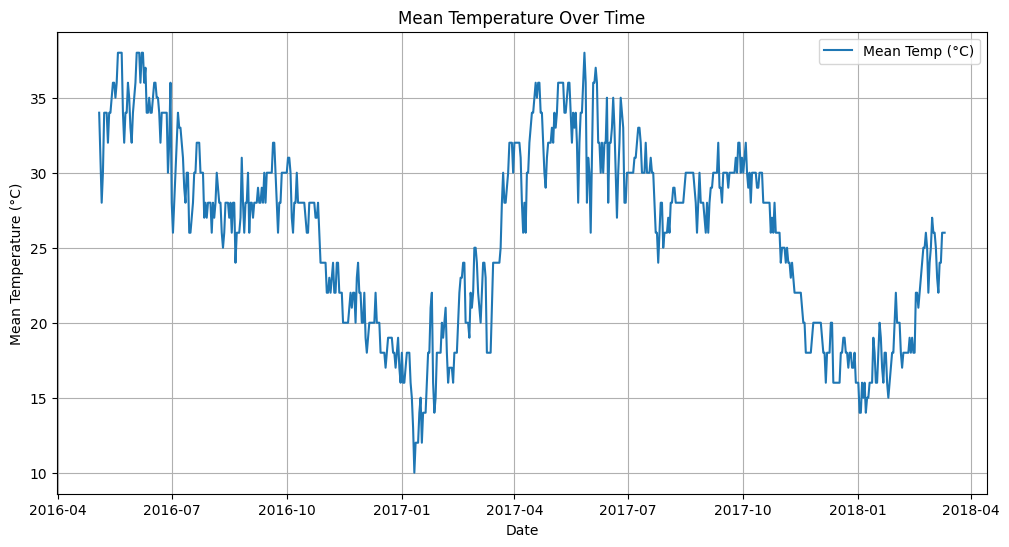

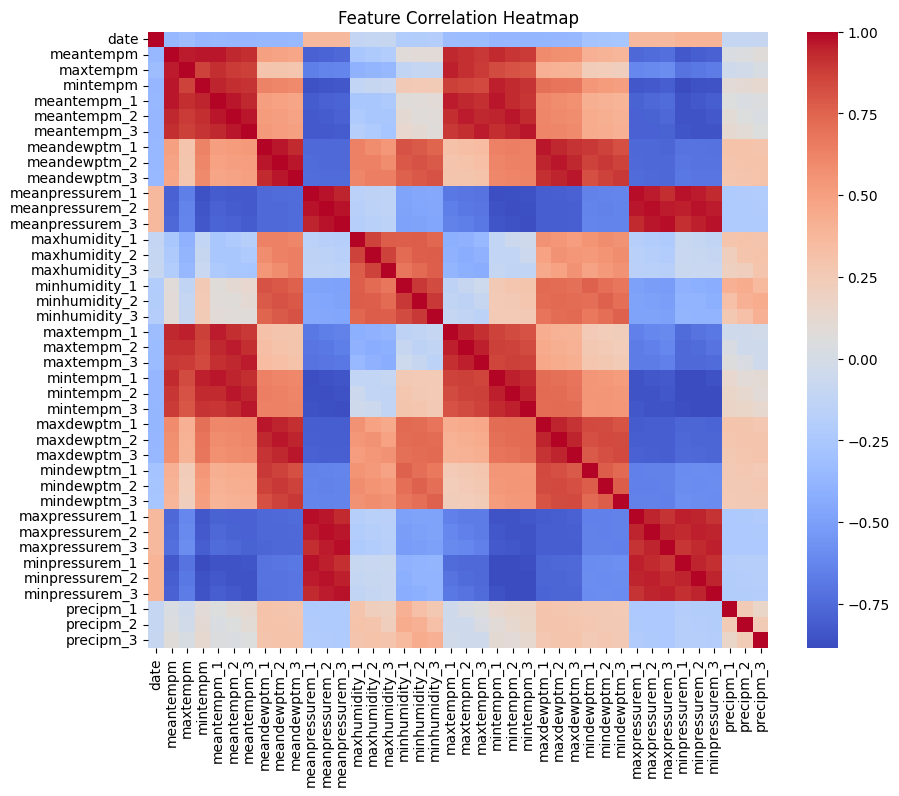

In [4]:
# Plotting Temperature Trends
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['meantempm'], label='Mean Temp (°C)')
plt.title('Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Heatmap of Correlations
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# 4: Feature Selection and Data Preparation

In [5]:
# Feature Selection
# Target variable: Mean Temperature ('meantempm')
# Features: Lagged variables (e.g., 'meantempm_1', 'meandewptm_1', etc.)
target = 'meantempm'
features = [col for col in data.columns if col not in ['date', target]]

X = data[features].values
y = data[target].values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the Features
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Reshape Input for LSTM
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# 5: Build and Compile RNN Model

In [6]:
# Build the RNN Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# 6: Train the Model

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2921 - val_loss: 0.1032
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0737 - val_loss: 0.0497
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0466 - val_loss: 0.0316
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0315 - val_loss: 0.0185
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0200 - val_loss: 0.0111
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - val_loss: 0.0064
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - val_loss: 0.0050
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - val_loss: 0.0043
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - val_loss: 0.0040
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - val_loss: 0.0040
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - val_loss: 0.0040
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - val_l

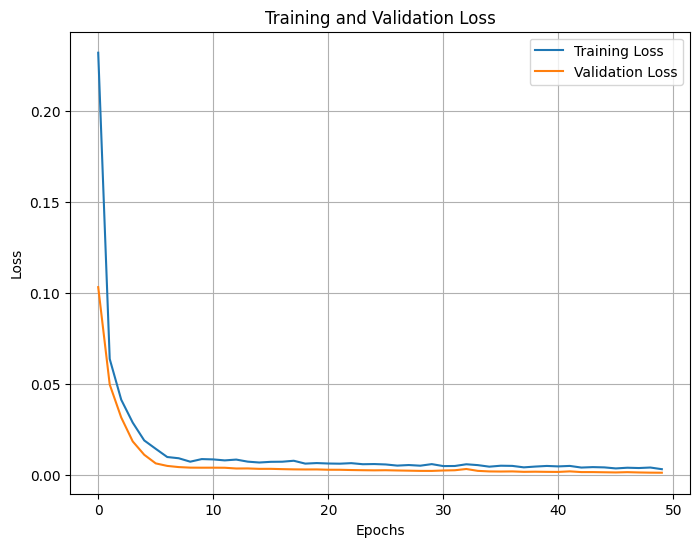

In [7]:
# Train the Model
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Plot Training Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 7: Model Evaluation

In [8]:
# Make Predictions
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
Mean Squared Error: 0.9375
Mean Absolute Error: 0.7117
R^2 Score: 0.9740


# 8: Visualize Actual vs Predicted Values

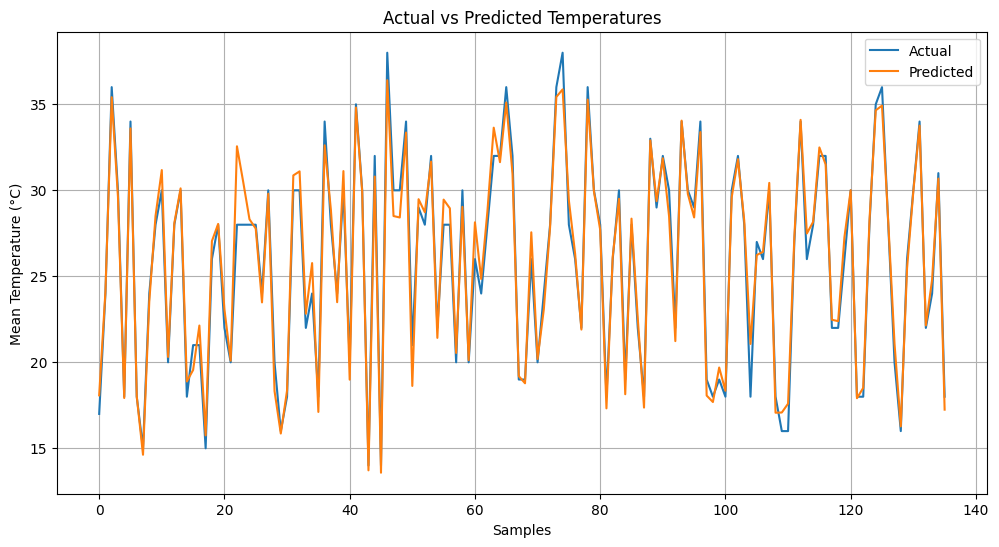

In [9]:
# Visualize Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Temperatures')
plt.xlabel('Samples')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()